In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from PIL import Image
import os

In [ ]:
# file_names = ["univ2003_06.txt",
#          "univ2003_07.txt",
#          "univ2003_08.txt",
#          "univ2003_09.txt",
#          "univ2003_10.txt",
#          "univ2003_11.txt",
#          "univ2003_12.txt",]
file_names = ["univ2002_01.txt"]

In [39]:
cme_all = pd.DataFrame()
for file in file_names:
    cme_month = pd.read_fwf(
        file,
        skiprows=4,
        header=None
    )
    cme_all = pd.concat([cme_all, cme_month])

In [40]:
cme_all.__len__()

627

In [41]:
is_Halo = cme_all.iloc[:, 12].astype(str).str.contains("Halo", na=False)

In [42]:
cme = cme_all.iloc[:, 10].astype(str).str[:3]
cme = pd.to_numeric(cme, errors='coerce')
cme

0     6.7
1     6.1
2     NaN
3     1.1
4     NaN
     ... 
68    4.4
69    NaN
70    NaN
71    NaN
72    NaN
Name: 10, Length: 627, dtype: float64

In [43]:
cme[cme.isna() | ~is_Halo] = 0
cme = pd.to_numeric(cme, errors='coerce')

In [44]:
cme[cme > 0]

3      1.1
5      1.1
8      1.9
21     1.0
51     1.7
53     3.9
54     2.4
64     1.1
65     1.6
3      6.8
53     4.6
48     6.2
73     3.2
55     1.8
83     1.5
25     6.0
59     3.6
66     7.8
70     8.1
82     2.8
85     5.7
88     1.1
92     6.9
100    1.2
103    2.4
106    3.9
114    5.9
2      4.2
33     6.0
38     1.2
42     4.7
45     3.2
51     3.6
10     1.4
67     1.6
Name: 10, dtype: float64

In [53]:
cme_event = pd.DataFrame({
    "date": cme_all.iloc[:, 0],
    "strength": cme
})
cme_event

,date,strength
0,2003/06/01,0.0
1,2003/06/01,0.0
2,2003/06/01,0.0
3,2003/06/02,1.1
4,2003/06/02,0.0
...,...,...
68,2003/12/25,0.0
69,2003/12/25,0.0
70,2003/12/27,0.0
71,2003/12/27,0.0


In [54]:
# 1) 먼저 date를 datetime으로 변환
cme_event["date"] = pd.to_datetime(cme_event["date"])

# 2) 그 다음에 일별 합치기
cme_daily = cme_event.groupby("date", as_index=False)["strength"].sum()

# 3) 날짜 range 만들기 (datetime 기준)
full_dates = pd.date_range(cme_daily["date"].min(), cme_daily["date"].max(), freq="D")

# 4) reindex로 빠진 날짜 채우기
cme_filled = (
    cme_daily
    .set_index("date")
    .reindex(full_dates, fill_value=0)
    .rename_axis("date")
    .reset_index()
)


In [55]:
cme_filled.__len__()

212

<Axes: >

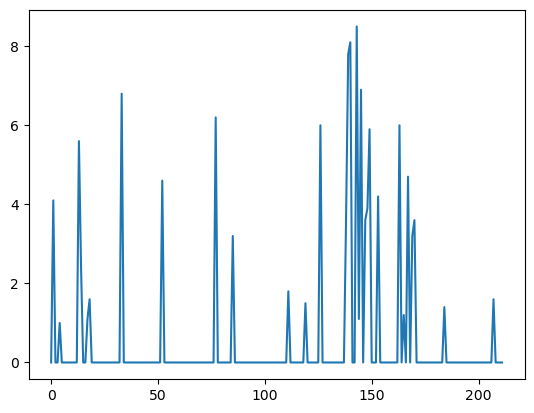

In [56]:
cme_filled['strength'].plot()

In [57]:
cme_filled['strength'].values

array([0. , 4.1, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       5.6, 2.4, 0. , 0. , 1.1, 1.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 6.8, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       4.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 6.2,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.2, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 1.8, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1.5, 0. , 0. , 0. , 0. , 0. , 0. , 6. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.6, 7.8, 8.1, 0. , 0. ,
       8.5, 1.1, 6.9, 0. , 3.6, 3.9, 5.9, 0. , 0. , 0. , 4.2, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 6. , 0. , 1.2, 0. , 4.7, 0. ,
       3.2, 3.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [58]:
pickle.dump(cme_filled['strength'].values, open("cme.pkl", "wb"))